# SimpleRNN

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.1.0'

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500
bastch_size=32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences') # 25000 筆訓練用序列資料 (評論)
print(len(input_test), 'test sequences')# 25000 筆測試用序列資料

Using TensorFlow backend.


25000 train sequences
25000 test sequences


In [3]:
input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
model=keras.Sequential([
    keras.layers.Embedding(max_features,32),#回傳3D浮點數向量
    keras.layers.SimpleRNN(32),#RNN層處理3D向量
    keras.layers.Dense(1,activation='sigmoid')
])

model.summary()
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(input_train,
                   y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)#從訓練集按比例抽出當作驗證集

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 55s 3ms/sample - loss: 0.6499 - acc: 0.6120 - val_loss: 0.5142 - val_acc: 0.7806
Epoch 2/10
20000/20000 [==============================] - 54s 3ms/sample - loss: 0.4166 - acc: 0.8242 - val_loss: 0.3788 - val_acc: 0.8424
Epoch 3/10
20000/20000 [==============================] - 55s 3ms/sample - loss: 0.2967 - acc: 0.8798 - val_loss: 0.3625 - val_acc: 0.8476
Epoch 4/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.2320 - acc: 0.9099 - val_loss: 0.3816 - val_acc: 0.8438
Epoch 5/10
20000/20000 [==============================] - 59s 3ms/sample - loss: 0.1771 - acc: 0.9339 - val_loss: 0.3851 - val_acc: 0.8488
Epoch 6/10
20000/20000 [==============================] - 58s 3ms/sample - loss: 0.1288 - acc: 0.9538 - val_loss: 0.4934 - val_acc: 0.8210
Epoch 7/10
20000/20000 [==============================] - 64s 3ms/sample - loss: 0.0958 - acc: 0.9672 - val_loss: 0.4

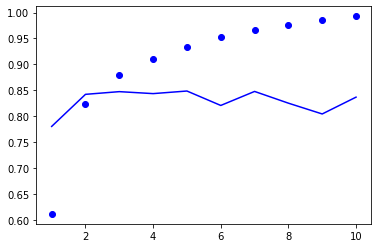

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

In [7]:
model.evaluate(input_test,y_test)

25000/25000 [==============================] - 36s 1ms/sample - loss: 0.5977 - acc: 0.8281


[0.5976860547280312, 0.82812]

# LSTM (Long Short-Term Memory)

允許之後重新輸入過去的資訊，從而解決梯度消失的問題

In [8]:
model2=keras.Sequential([
    keras.layers.Embedding(max_features,32),
    keras.layers.LSTM(32),
    keras.layers.Dense(1,activation='sigmoid')
])

model2.summary()
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
history2 = model2.fit(input_train,
                     y_train,
                     epochs=10,
                     batch_size=128,
                     validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 557us/sample - loss: 0.5123 - acc: 0.7570 - val_loss: 0.3426 - val_acc: 0.8626
Epoch 2/10
20000/20000 [==============================] - 8s 405us/sample - loss: 0.3004 - acc: 0.8823 - val_loss: 0.4849 - val_acc: 0.8234
Epoch 3/10
20000/20000 [==============================] - 8s 417us/sample - loss: 0.2373 - acc: 0.9106 - val_loss: 0.3258 - val_acc: 0.8780
Epoch 4/10
20000/20000 [==============================] - 8s 401us/sample - loss: 0.2008 - acc: 0.9247 - val_loss: 0.2821 - val_acc: 0.8814
Epoch 5/10
20000/20000 [==============================] - 8s 417us/sample - loss: 0.1807 - acc: 0.9339 - val_loss: 0.3123 - val_acc: 0.8638
Epoch 6/10
20000/20000 [==============================] - 8s 420us/sample - loss: 0.1576 - acc: 0.9438 - val_loss: 0.3120 - val_acc: 0.8850
Epoch 7/10
20000/20000 [==============================] - 8s 409us/sample - loss: 0.1405 - acc: 0.9507 - val_l

In [10]:
model2.evaluate(input_test,y_test)

25000/25000 [==============================] - 11s 435us/sample - loss: 0.4819 - acc: 0.8545


[0.4819309673833847, 0.85452]

# 雙向LSTM

In [16]:
model3=keras.Sequential([
    keras.layers.Embedding(max_features,32),
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dense(1,activation='sigmoid')
])
model3.summary()

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model3.fit(input_train,
          y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 710us/sample - loss: 0.5065 - acc: 0.7563 - val_loss: 0.7131 - val_acc: 0.6992
Epoch 2/10
20000/20000 [==============================] - 12s 587us/sample - loss: 0.2995 - acc: 0.8850 - val_loss: 0.3830 - val_acc: 0.8636
Epoch 3/10
20000/20000 [=======================

In [17]:
model3.evaluate(input_test,y_test)

25000/25000 [==============================] - 17s 669us/sample - loss: 0.5438 - acc: 0.8529


[0.5438360992741584, 0.85288]